# California House Price Prediction.

## Introduction

This notebook explores and implements the housing price prediction using various regression machine learning models.

## Dataset

We use the Kaggle California Housing Prices Dataset, which pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data  - [Dataset Link](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

# Import Basic Libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Opening the Train Dataset and Data Exploration

In [229]:
# Fetch the Dataset
var = fetch_california_housing()
var

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [230]:
# The data is as a dictionary. Let's check the keys in the dictionary
var.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [231]:
# Convert the features and target dictionaries to Pandas DataFrame
Data = pd.DataFrame(var['data'], columns= var['feature_names'])
Target = pd.DataFrame(var['target'], columns=['Price'])

In [232]:
# Concatenate the features and target columns into a single DataFrame
df = pd.concat([Data, Target], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [233]:
# Create a copy for safety always
df_copy = df.copy()

In [235]:
# Check NULL Values, if any...
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [236]:
# Check the datatype of values in each column
for i in df.columns:
    print(i, type(df[i].iloc[0]))

MedInc <class 'numpy.float64'>
HouseAge <class 'numpy.float64'>
AveRooms <class 'numpy.float64'>
AveBedrms <class 'numpy.float64'>
Population <class 'numpy.float64'>
AveOccup <class 'numpy.float64'>
Latitude <class 'numpy.float64'>
Longitude <class 'numpy.float64'>
Price <class 'numpy.float64'>


# Data Preprocessing

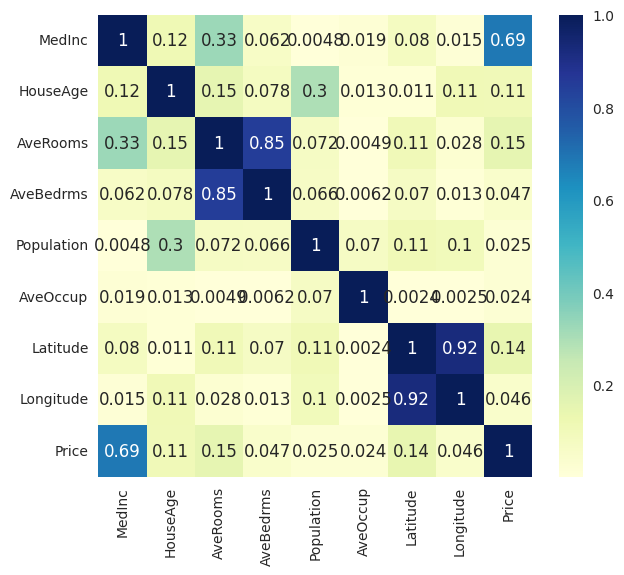

In [237]:
# Plot a Heatmap of the columns, to check their correlations
plt.figure(figsize=(7,6))
seaborn.heatmap(df.corr().abs(), cmap="YlGnBu", annot=True)
plt.show()

In [238]:
upper_tri = df.corr().abs().where(np.triu(np.ones(df.corr().abs().shape),k=1).astype(np.bool))
print(upper_tri)

            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         NaN  0.119034  0.326895   0.062040    0.004834  0.018766   
HouseAge       NaN       NaN  0.153277   0.077747    0.296244  0.013191   
AveRooms       NaN       NaN       NaN   0.847621    0.072213  0.004852   
AveBedrms      NaN       NaN       NaN        NaN    0.066197  0.006181   
Population     NaN       NaN       NaN        NaN         NaN  0.069863   
AveOccup       NaN       NaN       NaN        NaN         NaN       NaN   
Latitude       NaN       NaN       NaN        NaN         NaN       NaN   
Longitude      NaN       NaN       NaN        NaN         NaN       NaN   
Price          NaN       NaN       NaN        NaN         NaN       NaN   

            Latitude  Longitude     Price  
MedInc      0.079809   0.015176  0.688075  
HouseAge    0.011173   0.108197  0.105623  
AveRooms    0.106389   0.027540  0.151948  
AveBedrms   0.069721   0.013344  0.046701  
Population  0.108785   0.0997

In [239]:
len(df.columns)

9

In [240]:
# Check the skewness of values in each column
for i in df.columns:
    print(i, df[i].skew())

MedInc 1.6466567021344465
HouseAge 0.060330637599136865
AveRooms 20.697868956710646
AveBedrms 31.316956246782663
Population 4.93585822672712
AveOccup 97.63956096369479
Latitude 0.46595300370997006
Longitude -0.2978012079524362
Price 0.9777632739098345


In [ ]:
# Drop the one amongst two columns, if there are any two columns which are highly correlated 
'''
    Here we drop AveBedrms as AveBedrms and AveRooms are highly correlated
    Similarly, we drop Latitude as Latitude and Longitude are highly correlated
'''
df = df.drop('AveBedrms', axis=1)
df = df.drop('Latitude', axis=1)

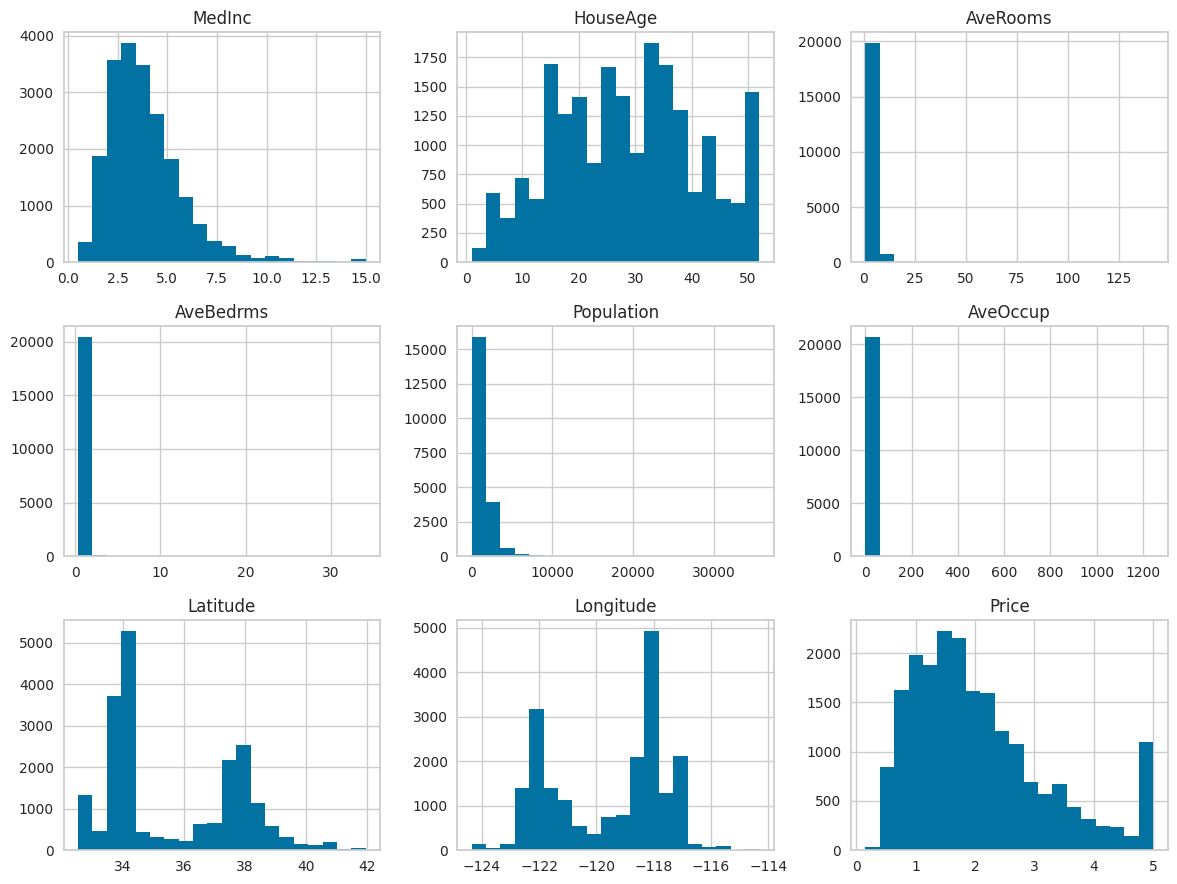

In [241]:
# Plot the distribution of data in the columns
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column on a separate subplot
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=20)
    ax.set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [242]:
# List the most skewed columns
skewed_cols = ['AveRooms', 'Population', 'AveOccup']

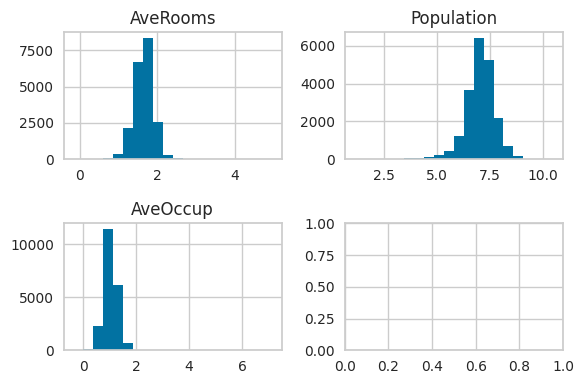

In [244]:
# Plot the skewed columns' distribution after taking log of the values to check if taking log will be a suitable method for handling data skewness
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column on a separate subplot
for i, col in enumerate(skewed_cols):
    ax = axes[i]
    ax.hist(np.log(df[col]), bins=20)
    ax.set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

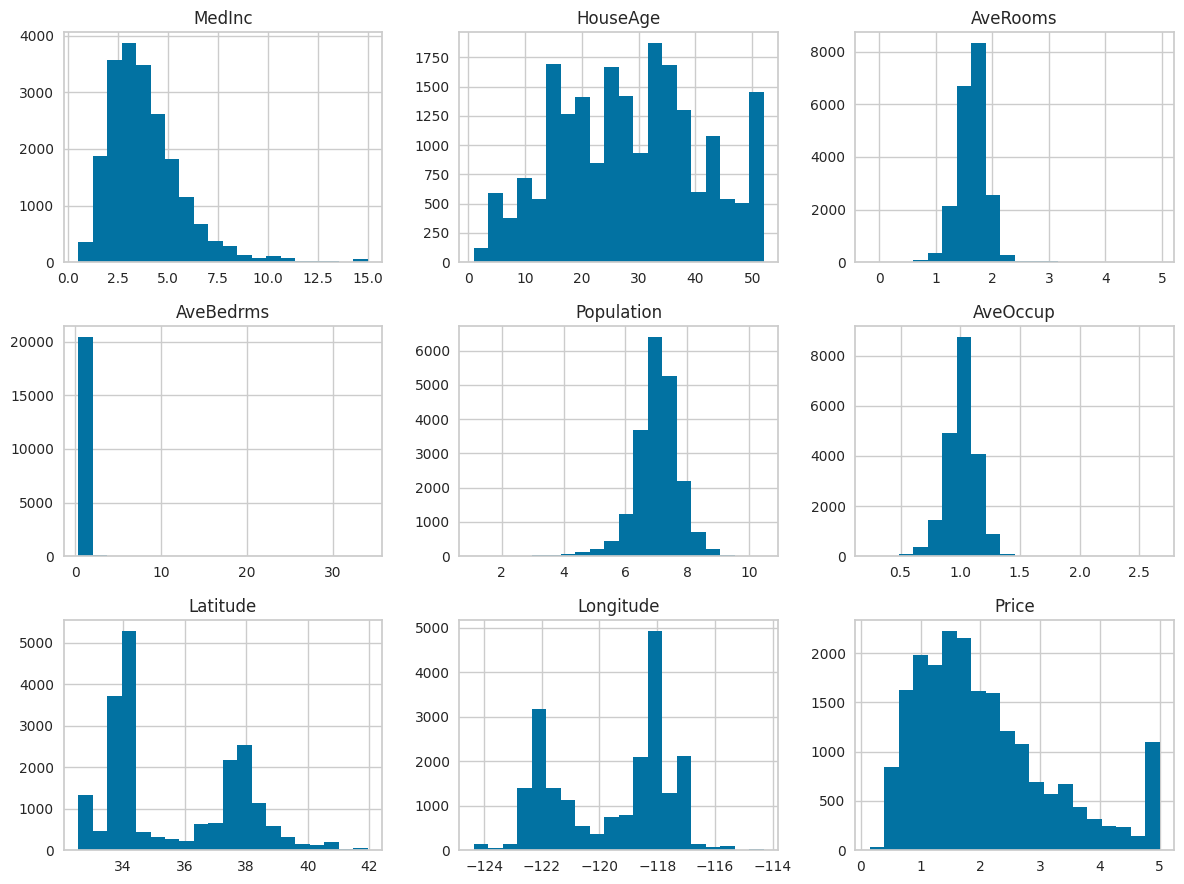

In [245]:
for i in skewed_cols:
    df[i] = np.log(df[i]) # Taking log as skewness is handled well, which can be inferred from the plot above
    
df['AveOccup'] = np.sqrt(df['AveOccup']) # Taking square root of the values here, as this proves to be a better approach over taking log of the values
    
# Plot the distributions of all columns after handling skewness
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column on a separate subplot
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=20)
    ax.set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [246]:
# Check Skewness of each column again after handling it
for i in df.columns:
    print(i, df[i].skew())

MedInc 1.6466567021344465
HouseAge 0.060330637599136865
AveRooms 0.8680607951109436
AveBedrms 31.316956246782663
Population -1.070786100914493
AveOccup 0.14455197814215148
Latitude 0.46595300370997006
Longitude -0.2978012079524362
Price 0.9777632739098345


In [247]:
df = df.drop_duplicates() # Drop duplicate entries

In [248]:
df.isna().sum() # Check for NULL/na Values - AveOccup has 3

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      3
Latitude      0
Longitude     0
Price         0
dtype: int64

In [249]:
# Fill in missing values for AVEOccup using Median
df['AveOccup'].fillna(df['AveOccup'].median(), inplace=True) 

In [250]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.20) 

In [251]:
# Define a scaler function, which scales values between 0 and 1
scaler = MinMaxScaler()
# Fit and Transform values
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Use Machine Learning Models to Evaluate on the Data

## Pycaret is a very useful tool for checking multiple models' results at once.

In [252]:
from pycaret.regression import *

# Initialize the regression setup
regression_setup = setup(data=df, target='Price', train_size=0.8)

# Compare different regression models
best_model = compare_models()

,Description,Value
0,Session id,6804
1,Target,Price
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(16512, 9)"
6,Transformed test set shape,"(4128, 9)"
7,Numeric features,8
8,Rows with missing values,0.0%
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2961,0.2041,0.4512,0.8457,0.1359,0.1652,5.1280
lightgbm,Light Gradient Boosting Machine,0.3143,0.2233,0.4718,0.8312,0.1430,0.1779,0.7390
xgboost,Extreme Gradient Boosting,0.3138,0.2272,0.4760,0.8282,0.1441,0.1762,1.3420
rf,Random Forest Regressor,0.3323,0.2601,0.5094,0.8033,0.1517,0.1878,4.9680
et,Extra Trees Regressor,0.3367,0.2646,0.5139,0.7999,0.1518,0.1874,2.1750
gbr,Gradient Boosting Regressor,0.3705,0.2892,0.5374,0.7814,0.1641,0.2124,2.3520
lr,Linear Regression,0.4909,0.4534,0.6730,0.6574,0.2120,0.2949,0.5590
ridge,Ridge Regression,0.4909,0.4534,0.6730,0.6574,0.2120,0.2949,0.0850
lar,Least Angle Regression,0.4909,0.4534,0.6730,0.6574,0.2120,0.2949,0.0750
br,Bayesian Ridge,0.4909,0.4534,0.6730,0.6574,0.2120,0.2949,0.0720


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [253]:
# Trying out CatBoost Regressor

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the CatBoost Regressor model
model = CatBoostRegressor(iterations=500,  # Number of boosting iterations
                          depth=6,          # Depth of the trees
                          learning_rate=0.1, # Learning rate
                          loss_function='RMSE', # Loss function (Root Mean Squared Error)
                          verbose=100)      # Print progress every 200 iterations

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print()
# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

0:	learn: 1.0873255	total: 4.21ms	remaining: 2.1s
100:	learn: 0.4873877	total: 407ms	remaining: 1.61s
200:	learn: 0.4355006	total: 768ms	remaining: 1.14s
300:	learn: 0.4039951	total: 1.15s	remaining: 758ms
400:	learn: 0.3811013	total: 1.56s	remaining: 385ms
499:	learn: 0.3634680	total: 1.93s	remaining: 0us

Mean Squared Error: 0.37546097494384945
R2 Score: 0.7242200012905213


In [255]:
# Trying out XGB Regressor

import xgboost as xgb

# Create an XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror',  # For regression tasks
                         n_estimators=200,              # Number of boosting rounds (trees)
                         max_depth=3,                   # Maximum tree depth
                         learning_rate=0.1)             # Step size shrinkage during training

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print()
# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.40096049975242887
R2 Score: 0.705490334592527


### From the above results, we can see that the CatBoostRegressor and XGBoostRegressor have performed decently well, (CatBoostRegressor being slightly on the better end) in comparison to other models on the same data. 

## Final Results

Best Model - CatBoostRegressor

Mean Squared Error: 0.37546097494384945

R2 Score: 0.7242200012905213